**Importing the libraries**

In [5]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import json
import glob
from sklearn.model_selection import GridSearchCV

import scipy.signal
import pandas as pd
from scipy.signal import find_peaks

import numpy as np

In [6]:
final_df1 = pd.read_csv('D:\PIP\Data\Processed Data\model_1_data.csv' , index_col = 0)

In [7]:
elimination_df = pd.read_csv('D:\PIP\Data\Processed Data\model_2_data.csv', index_col = 0)

In [8]:
elimination_df['Label'].value_counts()

1    6610
0    2316
Name: Label, dtype: int64

In [5]:
final_df1.isna().sum()

Unnamed: 0                 0
Event_ID                   0
mean_of_sum                0
min_of_sum                 0
max_of_sum                 0
median_of_sum              0
variance_of_sum            1
activity_time              0
std_of_sum                 1
rms_of_sum                 0
crest_factor               0
no_of_peaks                0
PSD_0_to_5Hz_max           0
PSD_0_to_5Hz_min           0
PSD_0_to_5Hz_median        0
PSD_5_to_10Hz_max          0
PSD_5_to_10Hz_min          1
PSD_5_to_10Hz_median       1
PSD_10_to_15Hz_max         2
PSD_10_to_15Hz_min         2
PSD_10_to_15Hz_median      2
PSD_15_to_20Hz_max         1
PSD_15_to_20Hz_min         1
PSD_15_to_20Hz_median      1
Label                      0
Cat_Name                 246
Label E/NE                 0
Range_of_sum               0
dtype: int64

In [6]:
elimination_df.isna().sum()

Unnamed: 0                 0
Event_ID                   0
mean_of_sum                0
min_of_sum                 0
max_of_sum                 0
median_of_sum              0
variance_of_sum            0
activity_time              0
std_of_sum                 0
rms_of_sum                 0
crest_factor               0
no_of_peaks                0
PSD_0_to_5Hz_max           0
PSD_0_to_5Hz_min           0
PSD_0_to_5Hz_median        0
PSD_5_to_10Hz_max          0
PSD_5_to_10Hz_min          0
PSD_5_to_10Hz_median       0
PSD_10_to_15Hz_max         0
PSD_10_to_15Hz_min         0
PSD_10_to_15Hz_median      0
PSD_15_to_20Hz_max         0
PSD_15_to_20Hz_min         0
PSD_15_to_20Hz_median      0
Label                      0
Cat_Name                 166
Label E/NE                 0
Range_of_sum               0
dtype: int64

In [7]:
# dropping null values from the model dataframe for model 1

In [8]:
final_df1 = final_df1.dropna()

In [9]:
final_df1.shape

(12827, 28)

In [10]:
# dropping null values from the model dataframe for model 2

In [11]:
elimination_df = elimination_df.dropna()

In [12]:
elimination_df.shape

(8760, 28)

**Model building using logistic regression(First model i.e prediction of elimination and non-elimination)**

In [13]:
X = final_df1[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',             
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']].values
y = final_df1['Label E/NE'].values

In [14]:
### Creating the train, test and validate split

final_df1 = final_df1.sample(frac = 1, random_state = 101)

### Keeping first 60% rows for training, next 20% for validation and last 20% for testing sets.

train = final_df1[:int(len(final_df1)*0.6)]
validate = final_df1[int(len(final_df1)*0.6):int(len(final_df1)*0.8)]
test = final_df1[int(len(final_df1)*0.8):]

print(train.shape)
print(validate.shape)
print(test.shape)

(7696, 28)
(2565, 28)
(2566, 28)


In [15]:
### Separating the target column from the three datasets in X_data and y_data format.

X_train = train[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']]
y_train = train['Label E/NE']

In [16]:
X_validate = validate[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']]
y_validate = validate['Label E/NE']

In [17]:
X_test = test[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']]
y_test = test['Label E/NE']

In [18]:
y_test.value_counts()

1    1744
0     822
Name: Label E/NE, dtype: int64

In [19]:
def error_metrics(actual, predicted, X_data):
    print('Accuracy % age: ' + str(np.round(accuracy_score(actual, predicted)*100, 2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, log_reg.predict_proba(X_data)[:,1]),3)))
    print('\nClassification Report:')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(actual, predicted))
    return "Done"


In [20]:
### Training Dataset metrics and ROC-AUC Curve
log_reg = LogisticRegression(max_iter=200000,random_state = 101)
log_reg.fit(X_train, y_train)

print("\nTraining\n------------------------------------------------------------")
y_train_pred = log_reg.predict(X_train)
error_metrics(y_train, y_train_pred, X_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(log_reg, X_train, y_train)
plt.show()


Training
------------------------------------------------------------
Accuracy % age: 77.1
ROC-AUC Score: 0.785

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.39      0.52      2455
           1       0.77      0.95      0.85      5241

    accuracy                           0.77      7696
   macro avg       0.78      0.67      0.68      7696
weighted avg       0.77      0.77      0.74      7696


Confusion Matrix:
[[ 948 1507]
 [ 255 4986]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)



Validation
------------------------------------------------------------
Accuracy % age: 77.58
ROC-AUC Score: 0.786

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.39      0.52       790
           1       0.78      0.95      0.85      1775

    accuracy                           0.78      2565
   macro avg       0.77      0.67      0.69      2565
weighted avg       0.77      0.78      0.75      2565


Confusion Matrix:
[[ 311  479]
 [  96 1679]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


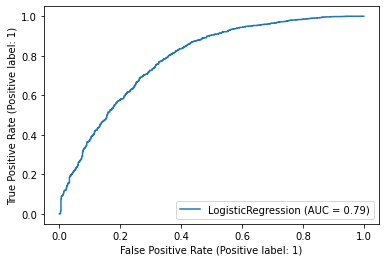

In [21]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y_validate_pred = log_reg.predict(X_validate)
error_metrics(y_validate, y_validate_pred, X_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(log_reg, X_validate, y_validate)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 77.58
ROC-AUC Score: 0.786

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.39      0.52       790
           1       0.78      0.95      0.85      1775

    accuracy                           0.78      2565
   macro avg       0.77      0.67      0.69      2565
weighted avg       0.77      0.78      0.75      2565


Confusion Matrix:
[[ 311  479]
 [  96 1679]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


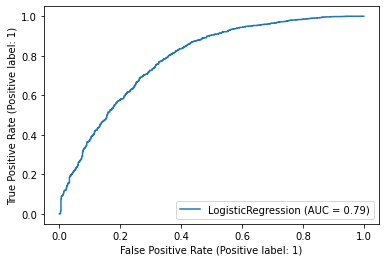

In [22]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y_validate_pred = log_reg.predict(X_validate)
error_metrics(y_validate, y_validate_pred, X_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(log_reg, X_validate, y_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 76.34
ROC-AUC Score: 0.787

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.39      0.51       822
           1       0.76      0.94      0.84      1744

    accuracy                           0.76      2566
   macro avg       0.76      0.66      0.68      2566
weighted avg       0.76      0.76      0.74      2566


Confusion Matrix:
[[ 317  505]
 [ 102 1642]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


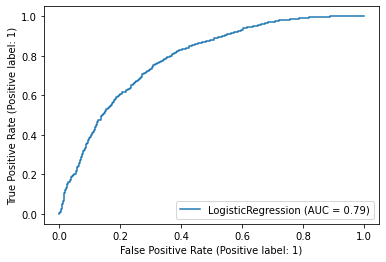

In [23]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y_test_pred = log_reg.predict(X_test)
error_metrics(y_test, y_test_pred, X_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(log_reg, X_test, y_test)
plt.show()

In [24]:
### Trying the same with probability thresholds as 0.4 and 0.6.

### threshold = 0.4

### Training Dataset metrics and ROC-AUC Curve
log_reg = LogisticRegression(random_state = 101)
log_reg.fit(X_train, y_train)

print("\nTraining\n------------------------------------------------------------")
y_train_probability = log_reg.predict_proba(X_train)[:,1]
y_train_pred = np.where(y_train_probability >= 0.4, 1, 0)
error_metrics(y_train, y_train_pred, X_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(log_reg, X_train, y_train)
plt.show()


Training
------------------------------------------------------------
Accuracy % age: 75.87
ROC-AUC Score: 0.785

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.30      0.44      2455
           1       0.75      0.97      0.85      5241

    accuracy                           0.76      7696
   macro avg       0.80      0.64      0.64      7696
weighted avg       0.78      0.76      0.72      7696


Confusion Matrix:
[[ 736 1719]
 [ 138 5103]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)



Validation
------------------------------------------------------------
Accuracy % age: 75.71
ROC-AUC Score: 0.786

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.29      0.42       790
           1       0.75      0.97      0.85      1775

    accuracy                           0.76      2565
   macro avg       0.77      0.63      0.63      2565
weighted avg       0.77      0.76      0.72      2565


Confusion Matrix:
[[ 226  564]
 [  59 1716]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


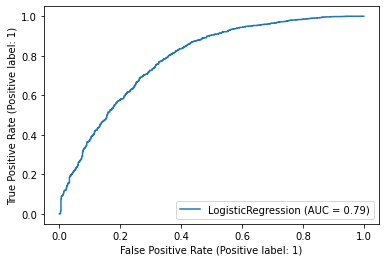

In [25]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y_validate_probabillity = log_reg.predict_proba(X_validate)[:,1]
y_validate_pred = np.where(y_validate_probabillity >= 0.4, 1, 0)
error_metrics(y_validate, y_validate_pred, X_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(log_reg, X_validate, y_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 76.34
ROC-AUC Score: 0.787

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.39      0.51       822
           1       0.76      0.94      0.84      1744

    accuracy                           0.76      2566
   macro avg       0.76      0.66      0.68      2566
weighted avg       0.76      0.76      0.74      2566


Confusion Matrix:
[[ 317  505]
 [ 102 1642]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


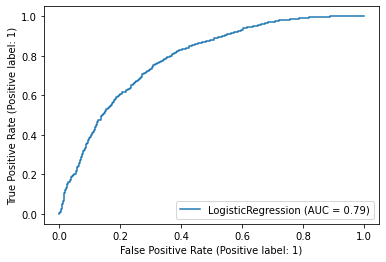

In [26]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y_test_probabillity = log_reg.predict_proba(X_test)[:,1]
y_test_pred = np.where(y_test_probabillity >= 0.4, 1, 0)
y_test_pred = log_reg.predict(X_test)
error_metrics(y_test, y_test_pred, X_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(log_reg, X_test, y_test)
plt.show()

In [27]:
### threshold = 0.6

### Training Dataset metrics and ROC-AUC Curve
log_reg = LogisticRegression(random_state = 101)
log_reg.fit(X_train, y_train)

print("\nTraining\n------------------------------------------------------------")
y_train_probabillity = log_reg.predict_proba(X_train)[:,1]
y_train_pred = np.where(y_train_probabillity >= 0.6, 1, 0)
error_metrics(y_train, y_train_pred, X_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(log_reg, X_train, y_train)
plt.show()


Training
------------------------------------------------------------
Accuracy % age: 77.22
ROC-AUC Score: 0.785

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.50      0.58      2455
           1       0.79      0.90      0.84      5241

    accuracy                           0.77      7696
   macro avg       0.75      0.70      0.71      7696
weighted avg       0.76      0.77      0.76      7696


Confusion Matrix:
[[1224 1231]
 [ 522 4719]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)



Validation
------------------------------------------------------------
Accuracy % age: 77.7
ROC-AUC Score: 0.786

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.53      0.59       790
           1       0.81      0.89      0.85      1775

    accuracy                           0.78      2565
   macro avg       0.74      0.71      0.72      2565
weighted avg       0.77      0.78      0.77      2565


Confusion Matrix:
[[ 420  370]
 [ 202 1573]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


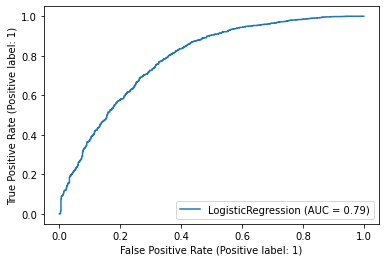

In [28]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y_validate_probabillity = log_reg.predict_proba(X_validate)[:,1]
y_validate_pred = np.where(y_validate_probabillity >= 0.6, 1, 0)
error_metrics(y_validate, y_validate_pred, X_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(log_reg, X_validate, y_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 75.84
ROC-AUC Score: 0.787

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.49      0.57       822
           1       0.79      0.88      0.83      1744

    accuracy                           0.76      2566
   macro avg       0.73      0.69      0.70      2566
weighted avg       0.75      0.76      0.75      2566


Confusion Matrix:
[[ 405  417]
 [ 203 1541]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


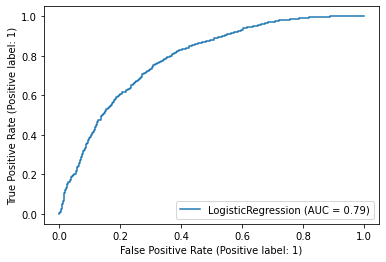

In [29]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y_test_probability = log_reg.predict_proba(X_test)[:,1]
y_test_pred = np.where(y_test_probability >= 0.6, 1, 0)
error_metrics(y_test, y_test_pred, X_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(log_reg, X_test, y_test)
plt.show()

**Using standard schalar**

In [30]:
sc = StandardScaler()
X1_train = sc.fit_transform(X_train)
X1_test = sc.transform(X_test)
X1_validate = sc.transform(X_validate)

In [31]:
### Training Dataset metrics and ROC-AUC Curve
log_reg = LogisticRegression(max_iter=200000,random_state = 101)
log_reg.fit(X1_train, y_train)

print("\nTraining\n------------------------------------------------------------")
y1_train_pred = log_reg.predict(X1_train)
error_metrics(y_train, y1_train_pred, X1_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(log_reg, X1_train, y_train)
plt.show()


Training
------------------------------------------------------------
Accuracy % age: 81.34
ROC-AUC Score: 0.825

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.55      0.65      2455
           1       0.82      0.94      0.87      5241

    accuracy                           0.81      7696
   macro avg       0.81      0.74      0.76      7696
weighted avg       0.81      0.81      0.80      7696


Confusion Matrix:
[[1354 1101]
 [ 335 4906]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


In [32]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation on scaled validation set\n------------------------------------------------------------")
y1_validate_pred = log_reg.predict(X1_validate)
error_metrics(y_validate, y1_validate_pred, X1_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(log_reg, X1_validate, y_validate)
plt.show()


Validation on scaled validation set
------------------------------------------------------------
Accuracy % age: 82.3
ROC-AUC Score: 0.831

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.57      0.67       790
           1       0.83      0.93      0.88      1775

    accuracy                           0.82      2565
   macro avg       0.81      0.75      0.77      2565
weighted avg       0.82      0.82      0.81      2565


Confusion Matrix:
[[ 454  336]
 [ 118 1657]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


In [33]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting test(scaled)\n------------------------------------------------------------")
y1_test_pred = log_reg.predict(X1_test)
error_metrics(y_test, y1_test_pred, X1_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(log_reg, X1_test, y_test)
plt.show()


Testing test(scaled)
------------------------------------------------------------
Accuracy % age: 80.75
ROC-AUC Score: 0.822

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.55      0.65       822
           1       0.82      0.93      0.87      1744

    accuracy                           0.81      2566
   macro avg       0.80      0.74      0.76      2566
weighted avg       0.80      0.81      0.80      2566


Confusion Matrix:
[[ 455  367]
 [ 127 1617]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


In [34]:
### Trying the same with probability thresholds as 0.4 and 0.6.

### threshold = 0.4

### Training Dataset metrics and ROC-AUC Curve
log_reg = LogisticRegression(max_iter=200000, random_state = 101)
log_reg.fit(X1_train, y_train)

print("\nTraining\n------------------------------------------------------------")
y1_train_probability = log_reg.predict_proba(X1_train)[:,1]
y1_train_pred = np.where(y1_train_probability >= 0.4, 1, 0)
error_metrics(y_train, y1_train_pred, X1_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(log_reg, X1_train, y_train)
plt.show()


Training
------------------------------------------------------------
Accuracy % age: 79.53
ROC-AUC Score: 0.825

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.42      0.57      2455
           1       0.78      0.97      0.87      5241

    accuracy                           0.80      7696
   macro avg       0.83      0.70      0.72      7696
weighted avg       0.81      0.80      0.77      7696


Confusion Matrix:
[[1030 1425]
 [ 150 5091]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


In [35]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y1_validate_probabillity = log_reg.predict_proba(X1_validate)[:,1]
y1_validate_pred = np.where(y1_validate_probabillity >= 0.4, 1, 0)
error_metrics(y_validate, y1_validate_pred, X1_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(log_reg, X1_validate, y_validate)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 81.01
ROC-AUC Score: 0.831

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.45      0.60       790
           1       0.80      0.97      0.88      1775

    accuracy                           0.81      2565
   macro avg       0.83      0.71      0.74      2565
weighted avg       0.82      0.81      0.79      2565


Confusion Matrix:
[[ 358  432]
 [  55 1720]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)



Testing
------------------------------------------------------------
Accuracy % age: 80.75
ROC-AUC Score: 0.822

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.55      0.65       822
           1       0.82      0.93      0.87      1744

    accuracy                           0.81      2566
   macro avg       0.80      0.74      0.76      2566
weighted avg       0.80      0.81      0.80      2566


Confusion Matrix:
[[ 455  367]
 [ 127 1617]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


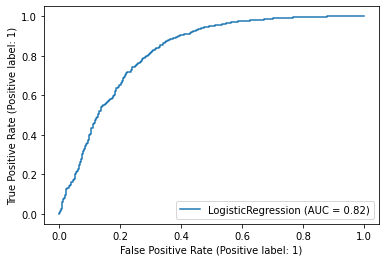

In [36]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y1_test_probabillity = log_reg.predict_proba(X1_test)[:,1]
y1_test_pred = np.where(y1_test_probabillity >= 0.4, 1, 0)
y1_test_pred = log_reg.predict(X1_test)
error_metrics(y_test, y1_test_pred, X1_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(log_reg, X1_test, y_test)
plt.show()

**Threshold = 0.6**


Training
------------------------------------------------------------
Accuracy % age: 80.26
ROC-AUC Score: 0.825

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      2455
           1       0.85      0.87      0.86      5241

    accuracy                           0.80      7696
   macro avg       0.77      0.76      0.77      7696
weighted avg       0.80      0.80      0.80      7696


Confusion Matrix:
[[1622  833]
 [ 686 4555]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


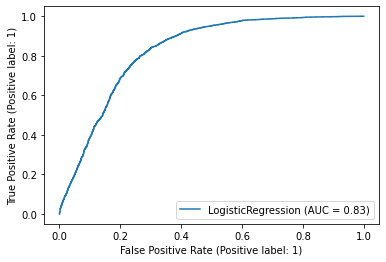

In [37]:
### threshold = 0.6

### Training Dataset metrics and ROC-AUC Curve
log_reg = LogisticRegression(max_iter=200000, random_state = 101)
log_reg.fit(X1_train, y_train) 
log_reg.fit(X1_train, y_train)

print("\nTraining\n------------------------------------------------------------")
y1_train_probabillity = log_reg.predict_proba(X1_train)[:,1]
y1_train_pred = np.where(y1_train_probabillity >= 0.6, 1, 0)
error_metrics(y_train, y1_train_pred, X1_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(log_reg, X1_train, y_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 80.39
ROC-AUC Score: 0.831

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       790
           1       0.85      0.87      0.86      1775

    accuracy                           0.80      2565
   macro avg       0.77      0.76      0.77      2565
weighted avg       0.80      0.80      0.80      2565


Confusion Matrix:
[[ 522  268]
 [ 235 1540]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


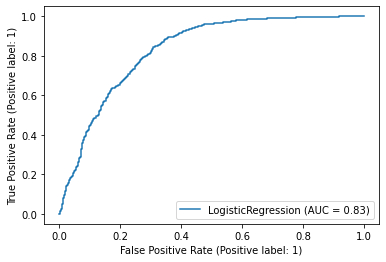

In [38]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y1_validate_probabillity = log_reg.predict_proba(X1_validate)[:,1]
y1_validate_pred = np.where(y1_validate_probabillity >= 0.6, 1, 0)
error_metrics(y_validate, y1_validate_pred, X1_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(log_reg, X1_validate, y_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 79.77
ROC-AUC Score: 0.822

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.68       822
           1       0.84      0.86      0.85      1744

    accuracy                           0.80      2566
   macro avg       0.77      0.76      0.76      2566
weighted avg       0.80      0.80      0.80      2566


Confusion Matrix:
[[ 543  279]
 [ 240 1504]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


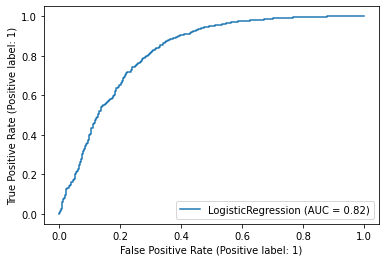

In [39]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y1_test_probability = log_reg.predict_proba(X1_test)[:,1]
y1_test_pred = np.where(y1_test_probability >= 0.6, 1, 0)
error_metrics(y_test, y1_test_pred, X1_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(log_reg, X1_test, y_test)
plt.show()

**Model building using logistic regression(Second model i.e prediction of urination and defecation)**

In [40]:
X2 = elimination_df[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']].values
y2 = elimination_df['Label'].values

In [41]:
### Creating the train, test and validate split

elimination_df = elimination_df.sample(frac = 1, random_state = 101)

### Keeping first 60% rows for training, next 20% for validation and last 20% for testing sets.

train = elimination_df[:int(len(elimination_df)*0.6)]
validate = elimination_df[int(len(elimination_df)*0.6):int(len(elimination_df)*0.8)]
test = elimination_df[int(len(elimination_df)*0.8):]

print(train.shape)
print(validate.shape)
print(test.shape)

(5256, 28)
(1752, 28)
(1752, 28)


In [42]:
### Separating the target column from the three datasets in X_data and y_data format.

X2_train = train[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']].values
y2_train = train['Label'].values

In [43]:
X2_validate = validate[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']].values
y2_validate = validate['Label'].values

In [44]:
X2_test = test[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']].values
y2_test = test['Label'].values

In [45]:
def error_metrics(actual, predicted, X_data):
    print('Accuracy % age: ' + str(np.round(accuracy_score(actual, predicted)*100, 2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, log_reg.predict_proba(X_data)[:,1]),3)))
    print('\nClassification Report:')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(actual, predicted))
    return "Done"



Training
------------------------------------------------------------
Accuracy % age: 73.93
ROC-AUC Score: 0.557

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.01      0.03      1373
           1       0.74      1.00      0.85      3883

    accuracy                           0.74      5256
   macro avg       0.64      0.50      0.44      5256
weighted avg       0.69      0.74      0.63      5256


Confusion Matrix:
[[  18 1355]
 [  15 3868]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


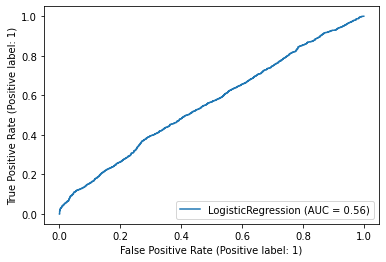

In [46]:
### Training Dataset metrics and ROC-AUC Curve
log_reg = LogisticRegression(max_iter=200000,random_state = 101)
log_reg.fit(X2_train, y2_train)

print("\nTraining\n------------------------------------------------------------")
y2_train_pred = log_reg.predict(X2_train)
error_metrics(y2_train, y2_train_pred, X2_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(log_reg, X2_train, y2_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 74.49
ROC-AUC Score: 0.539

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.02      0.03       447
           1       0.75      0.99      0.85      1305

    accuracy                           0.74      1752
   macro avg       0.62      0.51      0.44      1752
weighted avg       0.68      0.74      0.64      1752


Confusion Matrix:
[[   8  439]
 [   8 1297]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


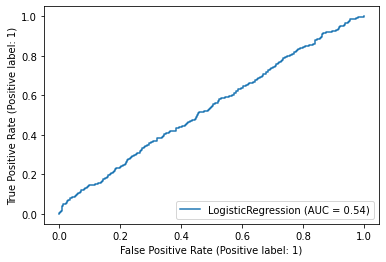

In [47]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y2_validate_pred = log_reg.predict(X2_validate)
error_metrics(y2_validate, y2_validate_pred, X2_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(log_reg, X2_validate, y2_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 73.86
ROC-AUC Score: 0.572

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.01      0.01       452
           1       0.74      0.99      0.85      1300

    accuracy                           0.74      1752
   macro avg       0.50      0.50      0.43      1752
weighted avg       0.62      0.74      0.63      1752


Confusion Matrix:
[[   3  449]
 [   9 1291]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


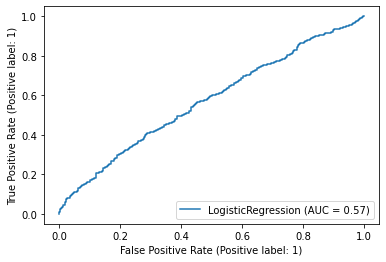

In [48]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y2_test_pred = log_reg.predict(X2_test)
error_metrics(y2_test, y2_test_pred, X2_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(log_reg, X2_test, y2_test)
plt.show()


Training
------------------------------------------------------------
Accuracy % age: 73.88
ROC-AUC Score: 0.557

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.01      0.02      1373
           1       0.74      1.00      0.85      3883

    accuracy                           0.74      5256
   macro avg       0.62      0.50      0.43      5256
weighted avg       0.68      0.74      0.63      5256


Confusion Matrix:
[[  11 1362]
 [  11 3872]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


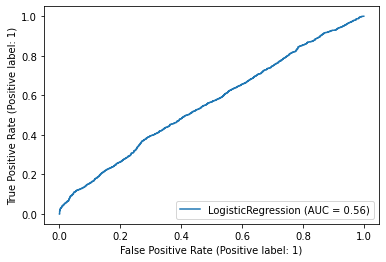

In [49]:
### Trying the same with probability thresholds as 0.4 and 0.6.

### threshold = 0.4

### Training Dataset metrics and ROC-AUC Curve
log_reg = LogisticRegression(random_state = 101)
log_reg.fit(X2_train, y2_train)

print("\nTraining\n------------------------------------------------------------")
y2_train_probability = log_reg.predict_proba(X2_train)[:,1]
y2_train_pred = np.where(y2_train_probability >= 0.4, 1, 0)
error_metrics(y2_train, y2_train_pred, X2_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(log_reg, X2_train, y2_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 74.54
ROC-AUC Score: 0.539

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.01      0.03       447
           1       0.75      1.00      0.85      1305

    accuracy                           0.75      1752
   macro avg       0.65      0.50      0.44      1752
weighted avg       0.70      0.75      0.64      1752


Confusion Matrix:
[[   6  441]
 [   5 1300]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


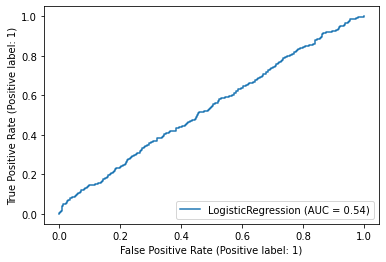

In [50]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y2_validate_probabillity = log_reg.predict_proba(X2_validate)[:,1]
y2_validate_pred = np.where(y2_validate_probabillity >= 0.4, 1, 0)
error_metrics(y2_validate, y2_validate_pred, X2_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(log_reg, X2_validate, y2_validate)
plt.show()



Testing
------------------------------------------------------------
Accuracy % age: 73.86
ROC-AUC Score: 0.572

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.01      0.01       452
           1       0.74      0.99      0.85      1300

    accuracy                           0.74      1752
   macro avg       0.50      0.50      0.43      1752
weighted avg       0.62      0.74      0.63      1752


Confusion Matrix:
[[   3  449]
 [   9 1291]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


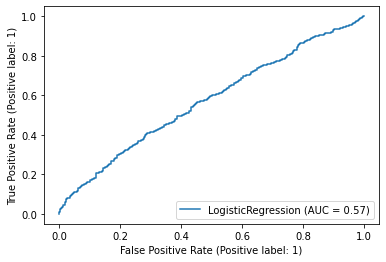

In [51]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y2_test_probabillity = log_reg.predict_proba(X2_test)[:,1]
y2_test_pred = np.where(y2_test_probabillity >= 0.4, 1, 0)
y2_test_pred = log_reg.predict(X2_test)
error_metrics(y2_test, y2_test_pred, X2_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(log_reg, X2_test, y2_test)
plt.show()

**Threshold 0.6**


Training
------------------------------------------------------------
Accuracy % age: 73.54
ROC-AUC Score: 0.557

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.02      0.05      1373
           1       0.74      0.99      0.85      3883

    accuracy                           0.74      5256
   macro avg       0.57      0.51      0.45      5256
weighted avg       0.65      0.74      0.64      5256


Confusion Matrix:
[[  33 1340]
 [  51 3832]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


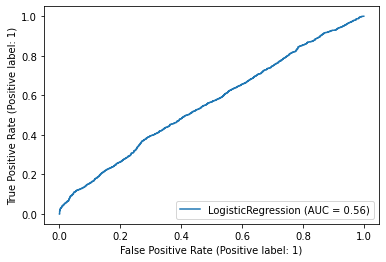

In [52]:
### threshold = 0.6

### Training Dataset metrics and ROC-AUC Curve
log_reg = LogisticRegression(random_state = 101)
log_reg.fit(X2_train, y2_train)

print("\nTraining\n------------------------------------------------------------")
y2_train_probabillity = log_reg.predict_proba(X2_train)[:,1]
y2_train_pred = np.where(y2_train_probabillity >= 0.6, 1, 0)
error_metrics(y2_train, y2_train_pred, X2_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(log_reg, X2_train, y2_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 74.43
ROC-AUC Score: 0.539

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.04      0.07       447
           1       0.75      0.99      0.85      1305

    accuracy                           0.74      1752
   macro avg       0.62      0.51      0.46      1752
weighted avg       0.68      0.74      0.65      1752


Confusion Matrix:
[[  17  430]
 [  18 1287]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


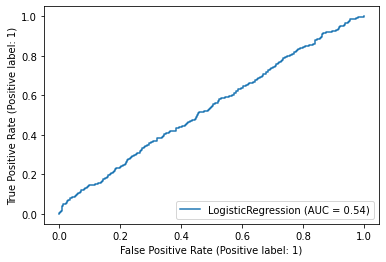

In [53]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y2_validate_probabillity = log_reg.predict_proba(X2_validate)[:,1]
y2_validate_pred = np.where(y2_validate_probabillity >= 0.6, 1, 0)
error_metrics(y2_validate, y2_validate_pred, X2_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(log_reg, X2_validate, y2_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 73.34
ROC-AUC Score: 0.572

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.02      0.03       452
           1       0.74      0.98      0.85      1300

    accuracy                           0.73      1752
   macro avg       0.49      0.50      0.44      1752
weighted avg       0.61      0.73      0.63      1752


Confusion Matrix:
[[   7  445]
 [  22 1278]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


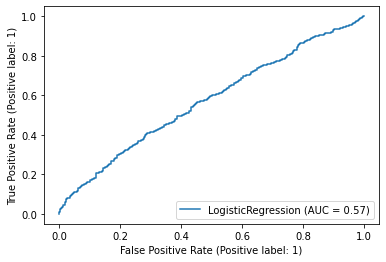

In [54]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y2_test_probability = log_reg.predict_proba(X2_test)[:,1]
y2_test_pred = np.where(y2_test_probability >= 0.6, 1, 0)
error_metrics(y2_test, y2_test_pred, X2_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(log_reg, X2_test, y2_test)
plt.show()

**Using standard schalar**

In [55]:
X22_train = sc.fit_transform(X2_train)
X22_test = sc.transform(X2_test)
X22_validate = sc.transform(X2_validate)


Training
------------------------------------------------------------
Accuracy % age: 80.67
ROC-AUC Score: 0.868

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.43      0.54      1373
           1       0.82      0.94      0.88      3883

    accuracy                           0.81      5256
   macro avg       0.77      0.69      0.71      5256
weighted avg       0.80      0.81      0.79      5256


Confusion Matrix:
[[ 596  777]
 [ 239 3644]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


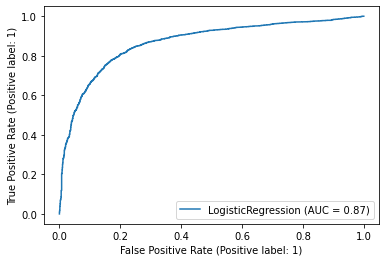

In [56]:
### Training Dataset metrics and ROC-AUC Curve
log_reg = LogisticRegression(max_iter=200000,random_state = 101)
log_reg.fit(X22_train, y2_train)

print("\nTraining\n------------------------------------------------------------")
y22_train_pred = log_reg.predict(X22_train)
error_metrics(y2_train, y22_train_pred, X22_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(log_reg, X22_train, y2_train)
plt.show()


Validation on scaled validation set
------------------------------------------------------------
Accuracy % age: 80.94
ROC-AUC Score: 0.853

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.41      0.52       447
           1       0.82      0.95      0.88      1305

    accuracy                           0.81      1752
   macro avg       0.77      0.68      0.70      1752
weighted avg       0.80      0.81      0.79      1752


Confusion Matrix:
[[ 184  263]
 [  71 1234]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


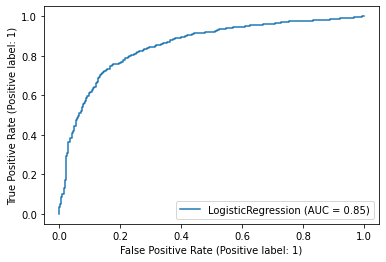

In [57]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation on scaled validation set\n------------------------------------------------------------")
y22_validate_pred = log_reg.predict(X22_validate)
error_metrics(y2_validate, y22_validate_pred, X22_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(log_reg, X22_validate, y2_validate)
plt.show()


Testing test(scaled)
------------------------------------------------------------
Accuracy % age: 81.91
ROC-AUC Score: 0.876

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.47      0.57       452
           1       0.84      0.94      0.89      1300

    accuracy                           0.82      1752
   macro avg       0.78      0.71      0.73      1752
weighted avg       0.81      0.82      0.80      1752


Confusion Matrix:
[[ 213  239]
 [  78 1222]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


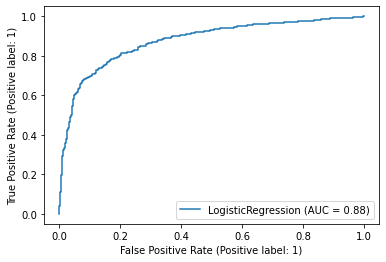

In [58]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting test(scaled)\n------------------------------------------------------------")
y22_test_pred = log_reg.predict(X22_test)
error_metrics(y2_test, y22_test_pred, X22_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(log_reg, X22_test, y2_test)
plt.show()

**Varying threshold to 0.4 with standard scalar**


Training
------------------------------------------------------------
Accuracy % age: 79.11
ROC-AUC Score: 0.868

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.33      0.45      1373
           1       0.80      0.96      0.87      3883

    accuracy                           0.79      5256
   macro avg       0.76      0.64      0.66      5256
weighted avg       0.78      0.79      0.76      5256


Confusion Matrix:
[[ 448  925]
 [ 173 3710]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


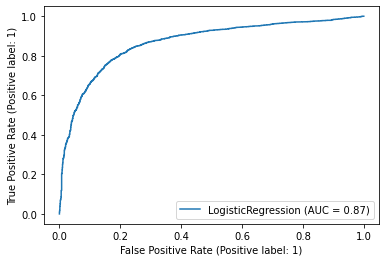

In [59]:
### threshold = 0.4

### Training Dataset metrics and ROC-AUC Curve
log_reg = LogisticRegression(random_state = 101)
log_reg.fit(X22_train, y2_train)

print("\nTraining\n------------------------------------------------------------")
y22_train_probability = log_reg.predict_proba(X22_train)[:,1]
y22_train_pred = np.where(y22_train_probability >= 0.4, 1, 0)
error_metrics(y2_train, y22_train_pred, X22_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(log_reg, X22_train, y2_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 79.22
ROC-AUC Score: 0.853

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.29      0.42       447
           1       0.80      0.96      0.87      1305

    accuracy                           0.79      1752
   macro avg       0.77      0.63      0.65      1752
weighted avg       0.78      0.79      0.76      1752


Confusion Matrix:
[[ 131  316]
 [  48 1257]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


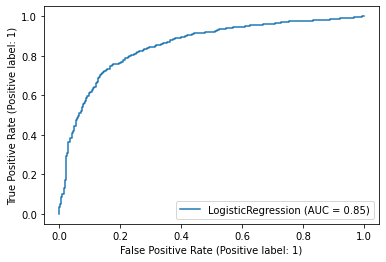

In [60]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y22_validate_probabillity = log_reg.predict_proba(X22_validate)[:,1]
y22_validate_pred = np.where(y22_validate_probabillity >= 0.4, 1, 0)
error_metrics(y2_validate, y22_validate_pred, X22_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(log_reg, X22_validate, y2_validate)
plt.show()



Testing
------------------------------------------------------------
Accuracy % age: 81.91
ROC-AUC Score: 0.876

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.47      0.57       452
           1       0.84      0.94      0.89      1300

    accuracy                           0.82      1752
   macro avg       0.78      0.71      0.73      1752
weighted avg       0.81      0.82      0.80      1752


Confusion Matrix:
[[ 213  239]
 [  78 1222]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


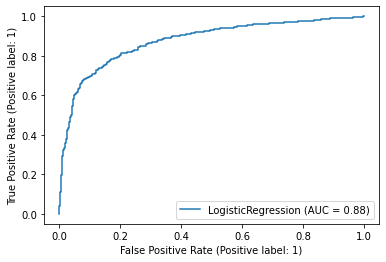

In [61]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y22_test_probabillity = log_reg.predict_proba(X22_test)[:,1]
y22_test_pred = np.where(y22_test_probabillity >= 0.4, 1, 0)
y22_test_pred = log_reg.predict(X22_test)
error_metrics(y2_test, y22_test_pred, X22_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(log_reg, X22_test, y2_test)
plt.show()

**Varying the threshold to 0.6**


Training
------------------------------------------------------------
Accuracy % age: 82.36
ROC-AUC Score: 0.868

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.59      0.64      1373
           1       0.86      0.91      0.88      3883

    accuracy                           0.82      5256
   macro avg       0.78      0.75      0.76      5256
weighted avg       0.82      0.82      0.82      5256


Confusion Matrix:
[[ 808  565]
 [ 362 3521]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


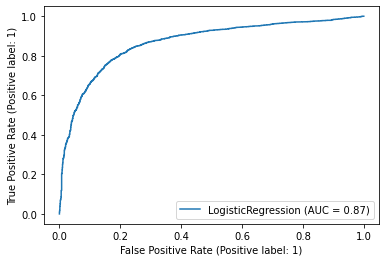

In [62]:
### threshold = 0.6

### Training Dataset metrics and ROC-AUC Curve
log_reg = LogisticRegression(random_state = 101)
log_reg.fit(X22_train, y2_train)

print("\nTraining\n------------------------------------------------------------")
y22_train_probabillity = log_reg.predict_proba(X22_train)[:,1]
y22_train_pred = np.where(y22_train_probabillity >= 0.6, 1, 0)
error_metrics(y2_train, y22_train_pred, X22_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(log_reg, X22_train, y2_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 82.19
ROC-AUC Score: 0.853

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.55      0.61       447
           1       0.86      0.91      0.88      1305

    accuracy                           0.82      1752
   macro avg       0.77      0.73      0.75      1752
weighted avg       0.81      0.82      0.81      1752


Confusion Matrix:
[[ 246  201]
 [ 111 1194]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


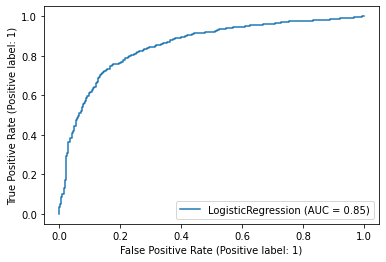

In [63]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y22_validate_probabillity = log_reg.predict_proba(X22_validate)[:,1]
y22_validate_pred = np.where(y22_validate_probabillity >= 0.6, 1, 0)
error_metrics(y2_validate, y22_validate_pred, X22_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(log_reg, X22_validate, y2_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 82.53
ROC-AUC Score: 0.876

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.60      0.64       452
           1       0.87      0.91      0.88      1300

    accuracy                           0.83      1752
   macro avg       0.78      0.75      0.76      1752
weighted avg       0.82      0.83      0.82      1752


Confusion Matrix:
[[ 269  183]
 [ 123 1177]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


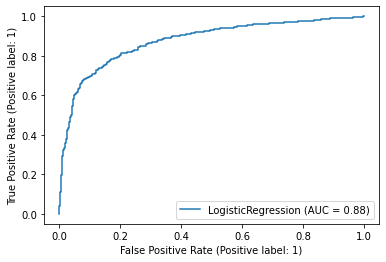

In [64]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y22_test_probability = log_reg.predict_proba(X22_test)[:,1]
y22_test_pred = np.where(y22_test_probability >= 0.6, 1, 0)
error_metrics(y2_test, y22_test_pred, X22_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(log_reg, X22_test, y2_test)
plt.show()